# TP 2 - Fonctions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice 1

Écrire une fonction qui prend un entier $\verb|n|$ en entrée, et retourne le couple $(a, b)$, où $a=\sum\limits_{i=1}^{n} \sqrt{i}$ et $b=\sum\limits_{i=1}^{n}\lfloor\ln (i)\rfloor$.

In [2]:
def sommes(n):
    I=np.arange(1,n+1,1)
    S=np.sum(np.sqrt(I))
    T=np.sum(np.floor(np.log(I)))
    return (S,T)

In [3]:
#Avec une boucle for :
def sommes2(n):
    S,T = 0,0
    for i in range(1,n+1):
        S+=np.sqrt(i)
        T+=np.floor(np.log(i))
    return (S,T)

### Exercice 2 

1. Justifier la convergence de la série $\sum \frac{(-1)^{n}}{n^{2}}$.

2. Créer un vecteur $\verb|u|$ de longueur $50$ qui a pour composantes les réels $ \frac{(-1)^{i}}{i^{2}}$, pour $i\in [| 1, 50|]$.

3. Créer un vecteur $\verb|v|$ de longueur 50 qui a pour composantes les réels $ \sum\limits_{k=1}^{i} \frac{(-1)^{k}}{k^{2}}$, pour $i\in [| 1, 50|]$.

4. Illustrer la convergence de la série en représentant graphiquement la suite de ses sommes partielles, et donner une valeur approchée à $10^{-1}$ près de $\sum\limits_{n=1}^{+\infty} \frac{(-1)^{n}}{n^{2}}$.

In [4]:
#2.
I=np.arange(1,51)
u=(-1)**I/I**2

In [5]:
#Avec une boucle for
u=np.zeros(50)
for i in range(50):
    u[i]=(-1)**(i+1)/(i+1)**2

In [6]:
#3.
#Avec la commande cumsum (somme cumulative)
v=np.cumsum(u)

In [7]:
#Avec une boucle for
v=np.zeros(50)
for i in range(50):
    v[i]=sum(u[0:i+1])

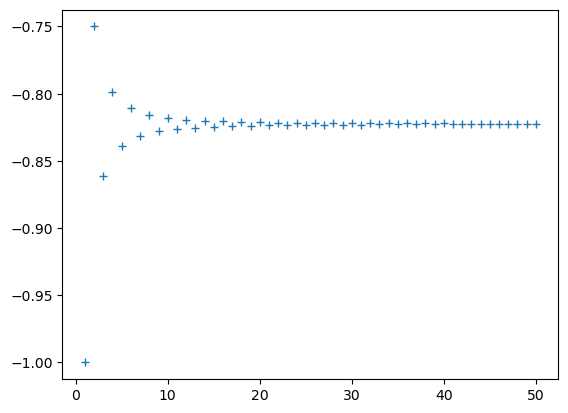

In [8]:
#4.
plt.plot(I,v,marker='+',linestyle='')
plt.show()

In [9]:
#On veut |S_{n+1}-S_n|<0.1 c'est-à-dire 1/(n+1)^2<0.1, soit n+1>sqrt(10), donc n>=3
I=np.arange(1,4)
u=(-1)**I/I**2
print("Approximation de la somme à 0.1 près :",sum(u))

Approximation de la somme à 0.1 près : -0.8611111111111112


### Exercice 3 

1. Soit $\left(u_{n}\right)_{n \in \mathbb{N}}$ la suite définie par $u_{0}=1$ et pour tout $n \in \mathbb{N}$, $u_{n+1}=2 n\, u_{n}+3$. Écrire une fonction ayant pour paramètre un entier $n \geq 0$ et qui renvoie la valeur de $u_{n}$.

2. Même question $\operatorname{avec}\left(u_{n}\right)_{n \in \mathbb{N}}$ définie par $u_{0}=1, u_{1}=-2$ et pour tout $n \in \mathbb{N}, u_{n+2}=2 u_{n+1}-u_{n}$.


In [10]:
#1.
def u(n):
    u=1
    for i in range(n):
        u=2*i*u+3
    return u

In [11]:
#2.
def u1(n):
    u=1; v=-2
    if n==0:
        return(u)
    for i in range(n-1):
        (u,v)=(v,2*v-u)
    return(v)

#en uilisant un tableau :
def u(n):
    U=np.zeros(max(2,n+1))
    U[0]=1; U[1]=-2
    for k in range(0,n-1):
        U[k+2]=2*U[k+1]-U[k]
    return(U)

### Exercice 4 

Représenter sur une même figure les représentations graphiques des fonctions $\sin$, $x \mapsto x$, $\displaystyle x \mapsto x-\frac{x^{3}}{3 !}$ et $\displaystyle x \mapsto x-\frac{x^{3}}{3 !}+\frac{x^{5}}{5 !}$ sur l'intervalle $[-\pi, \pi]$.

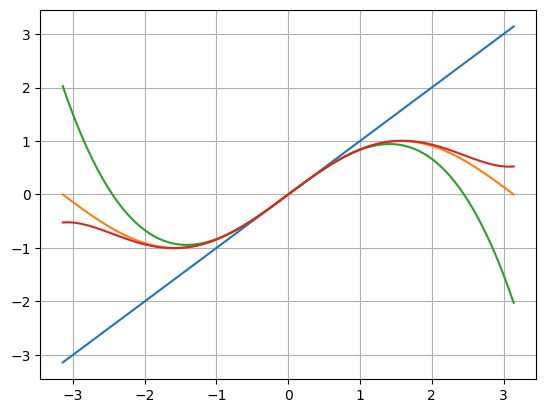

In [12]:
x=np.linspace(-np.pi,np.pi,100)
y=np.sin(x)
z=x-x**3/6
w=x-x**3/6+x**5/120
plt.plot(x,x)
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,w)
plt.grid()
plt.show()

### Exercice 5 

1. On considère la fonction $f: \mathbb{R} \rightarrow \mathbb{R}$ définie par 
  	$$f~:~x~\mapsto~  \frac{\mathrm{e}^{x}-\mathrm{e}^{-x}}{2}.$$
Montrer que $f$ définit une bijection de $\mathbb{R}$ sur $\mathbb{R}$.


2. Tracer sur un même graphique la courbe représentative de la fonction $f$ définie sur $[-2,2]$ ainsi que celle de sa fonction réciproque (sans chercher à la déterminer).


In [13]:
#2.
def f(x):
    return((np.exp(x)-np.exp(-x))/2)

In [14]:
x=np.linspace(-2,2,101)
y=f(x)

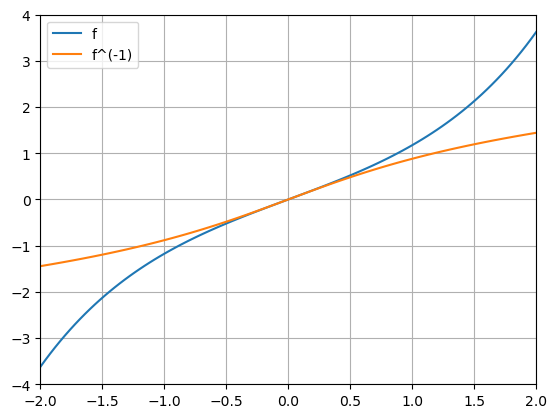

In [15]:
plt.plot(x,y,label="f")
plt.plot(y,x,label="f^(-1)")
plt.grid()
plt.legend()
plt.axis([-2,2,-4,4])
plt.show()

### Exercice 6

On note $\varphi$ la fonction définie par 
	$\varphi ~:~ x~\mapsto ~ \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{x^{2}}{2}\right)$,
et on introduit la fonction 
	$$\Phi ~:~ x ~\mapsto ~ \int_{-\infty}^{x} \varphi(t) \mathrm{d} t.$$

1. Définir la fonction $\varphi$ en langage Python. La représenter graphiquement sur le segment $[-4,4]$.

2. On rappelle que si $f$ est une fonction continue sur un segment $[a, b]$ alors
    $$\int_{a}^{b} f(t) \mathrm{d} t \, =\, \lim _{n \rightarrow+\infty} \frac{b-a}{n} 
        \sum_{k=1}^{n} f\left(a+k \; \frac{b-a}{n}\right).$$
Écrire une fonction $\verb|Phi|$ en Python qui prend comme argument des réels $\verb|x|$ et $\verb|a|$ et un entier $\verb|n|$, et renvoie une approximation de $\Phi(\verb|x|)$. On précisera comment choisir $\verb|a|$ et $\verb|n|$ de manière adéquate.

3. En utilisant la fonction $\verb|Phi|$, tracer une approximation de la représentation graphique de $\Phi$.
4. On souhaite vérifier graphiquement la qualité de cette représentation graphique. Pour ce faire, on a charge la bibliothèque $\verb|scipy.special|$ ($\verb|import scipy.special as sp|$), et on a recours à la fonction $\verb|sp.ndtr|$ qui, comme nous le verrons, est une bonne approximation de $\Phi$.
Tracer le graphe de la fonction $\verb|sp.ndtr|$, et comparer avec la courbe obtenue ci-dessus. On pourra faire varier les paramètres $\verb|a|$ et $\verb|n|$.

In [16]:
#1.
def phi(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)

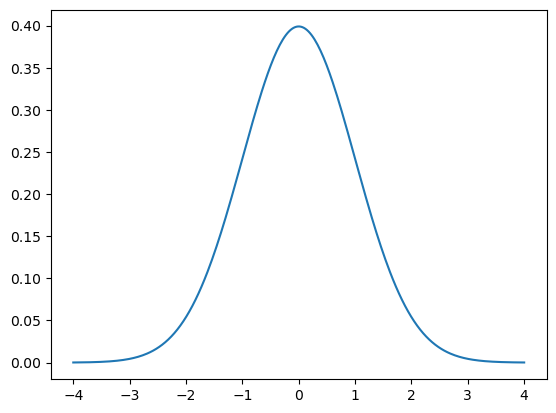

In [17]:
x=np.linspace(-4,4,300)
y=phi(x)
plt.plot(x,y)
plt.show()

In [18]:
#2.
def Phi(x,a,n):
    S=0
    h=(x-a)/n
    for i in range(1,n+1):
        S+=phi(a+i*h)
    return h*S

Pour obtenir une bonne approximation de $\Phi(x)$, il s'agira de choisir une valeur de $\verb|a|$ assez petite. Comme $\varphi(-4)$ est très proche de $0$, qui est la limite de $\phi$ en $-\infty$, le choix $a=-4$ semble suffisant.

Par ailleurs, il faudra choisir une valeur de $\verb|n|$ assez grande pour approcher la limite $n\to +\infty$.

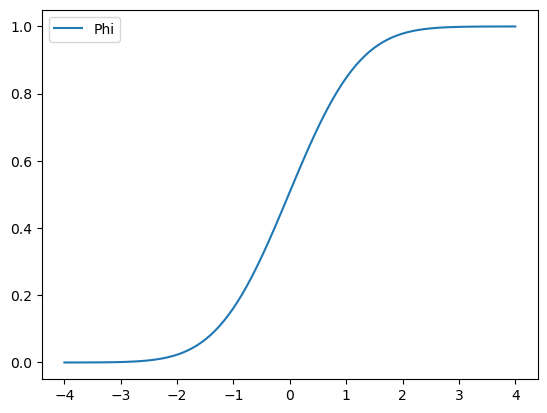

In [19]:
#3.
a=-4
n=100
x=np.linspace(-4,4,100)
y=Phi(x,a,n)
plt.plot(x,y, label="Phi")
plt.legend()
plt.show()

In [20]:
#4.
import scipy.special as sp

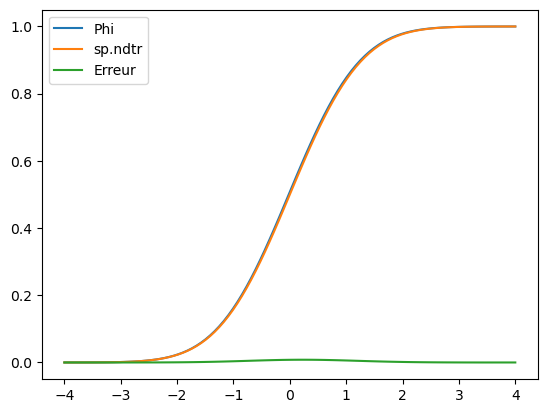

In [21]:
a=-4
n=100
x=np.linspace(-4,4,100)
y=Phi(x,a,n)
z=sp.ndtr(x)
plt.plot(x,y, label="Phi")
plt.plot(x,z, label="sp.ndtr")
plt.plot(x,abs(z-y), label="Erreur")
plt.legend()
plt.show()

### Exercice 7

1. Soit $f$ la fonction définie sur $\mathbb{R}_+^\star$ par
  	$$f~:~x ~\mapsto ~\frac{2}{x}+\ln x.$$
Tracer le graphe de $f$ ainsi que la droite d'équation $y=x$, puis vérifier graphiquement que :
    - l'intervalle $\left[\frac{3}{2}, 2\right]$ est stable par $f$,
    - il existe un unique $\alpha \in\left[\frac{3}{2}, 2\right]$ tel que $f(\alpha)=\alpha$, et en déterminer une valeur approchée.

2. Soit $\left(u_{n}\right)_{n \in \mathbb{N}}$ la suite définie par $u_{0}=2$ et pour tout $n \in \mathbb{N}$, $u_{n+1}=f\left(u_{n}\right)$.
Écrire une fonction $\verb|u(n)|$ ayant pour paramètre d'entrée $\verb|n|$, et qui renvoie la valeur de $u_{n}$.

3. On souhaite représenter graphiquement les premiers termes de la suite pour visualiser la convergence.
Écrire une fonction $\verb|suite(n)|$ prenant en argument un entier $\verb|n|$ et renvoyant le vecteur $\verb|x|$ des abscisses et celui $\verb|y|$ des ordonnées de la suite de points suivante :
	$$(u_0,u_1),~ (u_1,u_1),~ (u_1,u_2),~ (u_2, u_2),~ (u_2,u_3),~ (u_3, u_3),~ \ldots,~ (u_{n-1},u_n),~ (u_n, u_n).$$

4. Tracer sur un même graphique la courbe représentative $f$ pour des abscisses comprises entre $1{,}65$ et $1{,}75$, ainsi que la courbe obtenue en reliant les points ci-dessus pour $n=10$, puis conjecturer le comportement asymptotique de $\left(u_{n}\right)$.

5. Montrer que pour tout $(x, y) \in{\left[\frac{3}{2}, 2\right]}^{2},|f(x)-f(y)| \leq \frac{2}{9}\; |x-y|$.

6. Montrer que pour tout $n \in \mathbb{N},\left|u_{n+1}-\alpha\right| \leq \frac{2}{9}\; \left|u_{n}-\alpha\right|$ puis que $\left|u_{n}-\alpha\right| \leq\left(\frac{2}{9}\right)^{n}\left|u_{0}-\alpha\right|$.

7. En déduire que la suite $\left(u_{n}\right)_{n \in \mathbb{N}}$ converge vers $\alpha$.

8. Écrire une fonction qui donne une approximation de $\alpha$ à $\varepsilon$ près pour $\varepsilon>0$ donné.
En déduire une valeur approchée de $\alpha$ à $10^{-3}$ près.


In [22]:
#1.
def f(x):
    return 2/x+np.log(x)

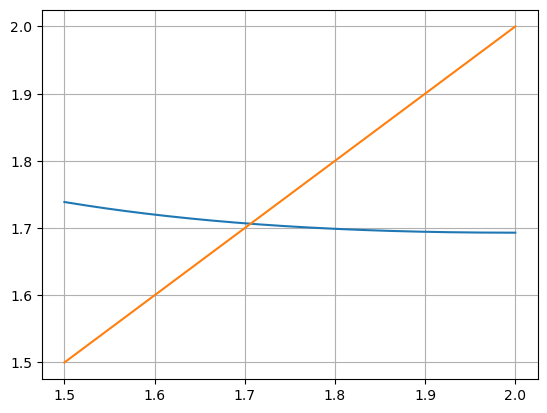

In [23]:
x=np.linspace(3/2,2,200)
y=f(x)
plt.plot(x,y)
plt.plot(x,x)
plt.grid()
plt.show()

In [24]:
#Estimation du point fixe par dichotomie
a, b= 3/2, 2
while (b-a)>1e-3:
    c=(a+b)/2
    if f(c)<c:
        b=c
    else:
        a=c
print("Estimation du point fixe de f sur [3/2,2] :",(a+b)/2)

Estimation du point fixe de f sur [3/2,2] : 1.70654296875


In [25]:
#2.
#Définition de u par une méthode itérative
def u(n):
    u=2
    for i in range(n):
        u=f(u)
    return(u)

In [26]:
#Définition de u par une méthode récursive
def u(n):
    if n==0:
        return(2)
    else:
        return(f(u(n-1)))

In [27]:
#3.
def suite(n):
    x,y= np.zeros(2*n), np.zeros(2*n)
    x[0], y[0] = 2, f(2)
    x[1], y[1] = f(2),f(2)
    for i in range(1,n):
        x[2*i], y[2*i] = x[2*i-1], f(x[2*i-1])
        x[2*i+1],y[2*i+1] = y[2*i], y[2*i]
    return (x,y)

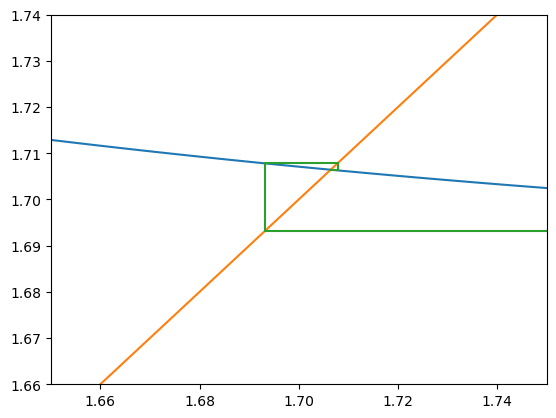

In [28]:
#4.
(x,y)=suite(10)
I=np.linspace(1.65,1.75,100)
z=f(I)
plt.plot(I,z)
plt.plot(I,I)
plt.plot(x,y)
plt.axis([1.65,1.75,1.66,1.74])
plt.show()

On sait que $|u_n-\alpha|\leqslant {\left(\frac 2 9\right)}^n |u_0-\alpha|$. Comme $u_0, \alpha \in [\frac 3 2, 2]$, on en déduit que $|u_0-\alpha|\leqslant 2-\frac 3 2 = \frac 1 2$. Finalement,
    $$|u_n-\alpha| \leqslant \frac 1 2 {\left(\frac 2 9\right)}^n.$$
Pour $\varepsilon>0$ fixé, on cherche donc $n$ tel que $\frac 1 2 {\left(\frac 2 9\right)}^n\leqslant \varepsilon$, ce qui se récrit $n\geqslant \frac{\ln(2\varepsilon)}{\ln\left(\frac 2 9\right)}$, soit $n \geqslant \left\lceil \frac{\ln(2\varepsilon)}{\ln\left(\frac 2 9\right)}\right\rceil$ .

In [29]:
#8.
def approx(eps):
    n=int(np.ceil(np.log(2*eps)/np.log(2/9)))
    return u(n)

In [30]:
eps=1e-3
print("Valeur approchée à approx(eps) à 1e-3 près :", approx(eps))

Valeur approchée à approx(eps) à 1e-3 près : 1.7064385792152557


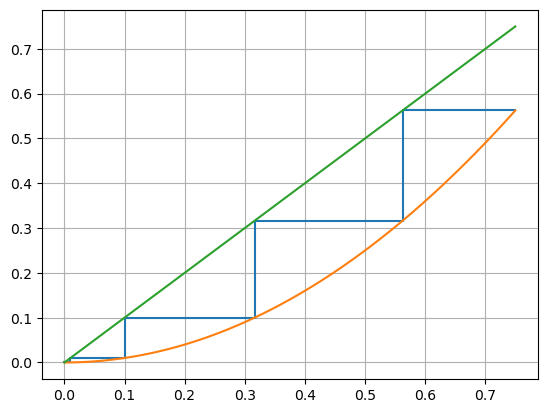

In [31]:
#Génralisation de la question 4 : programme traçant la courbe reliant les points pour une fonction f quelconque donnée
def courbe(u0,f,n):
    x,y= np.zeros(2*n), np.zeros(2*n)
    x[0], y[0] = u0, f(u0)
    x[1], y[1] = f(u0),f(u0)
    for i in range(1,n):
        x[2*i], y[2*i] = x[2*i-1], f(x[2*i-1])
        x[2*i+1],y[2*i+1] = y[2*i], y[2*i]
    return (x,y)

def suite(u0,f,n):
    (x,y)=courbe(u0,f,n)
    I=np.linspace(min(x),max(x),100)
    z=f(I)
    plt.plot(x,y)
    plt.plot(I,z)
    plt.plot(I,I)
    plt.grid()
    plt.show()
    
def f(x):
    return(x**2)

suite(3/4,f,100)